In [22]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Function to save data to CSV file
def save_to_csv(data):
    headers = ["Category", "Title", "Classification", "Date", "URL", "Content", "Correction"]
    with open('MISBAR_FACTCHECK_13-04-3pm.csv', 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)

# Initialize the WebDriver
driver = webdriver.Chrome()

try:
    # Open the webpage
    driver.get('https://misbar.com/factcheck')

    # Wait until the page finishes loading
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'li.dropdown-item')))

    # Find all the category elements
    category_elements = driver.find_elements(By.CSS_SELECTOR, 'li.dropdown-item')
    print(category_elements)

    # Iterate through each category
    for category_element in category_elements:
        print("Processing the : ",category_element ,"Category element")
        # Get the category name
        #category_name = category_element.text
        
        # Click on the category element
        category_element.click()
        
        # Wait until the page finishes loading
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.factcheck-feed-landing')))

        # Initialize counter for tracking containers
        container_counter = 0
        
        # Initialize set to keep track of URLs already scraped
        scraped_urls = set()
                # Loop to click "Load more" button 10 times
        for _ in range(40): #for more data make it bigger
            # Find the "Load more" button
            load_more_button = driver.find_element(By.CSS_SELECTOR, 'button.load-more')
            # If "Load more" button is found, click on it
            if load_more_button:
                load_more_button.click()
                # Give some time for the additional articles to load
                time.sleep(2)
            else:
                # If "Load more" button is not found, break the loop
                break
        
        # Loop to handle "Show more" button
        #while True:
            # Find and extract the news articles for the current category
            news_articles = driver.find_elements(By.CSS_SELECTOR, 'div.factcheck-item')
            
            # Output the articles for the current category
            for article in news_articles:
                url = article.find_element(By.CSS_SELECTOR, 'div.img-large-verticle-landing > a').get_attribute('href')

                # Skip if URL has already been scraped
                if url in scraped_urls:
                    continue
                
                #driver.switch_to.window(driver.window_handles[-1])
                
                title = article.find_element(By.CSS_SELECTOR, 'h3.card-title').text
                date = article.find_element(By.CSS_SELECTOR, 'span.article--card_date').text 
                try:
                    classification = article.find_element(By.CSS_SELECTOR, 'div.classification > span').text
                    print(classification)
                    category_name = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.category-type'))).text
                    print(category_name)
                except Exception as e:
                    content = "Category not available"
                # Open the article in a new tab
                driver.execute_script("window.open('{}', '_blank');".format(url))
                # Switch to the newly opened tab
                driver.switch_to.window(driver.window_handles[-1])
                #try:
                    
                  
                #except Exception as e:
                    #print("Error extracting category name:", e)
                # Find the content of the article
                try:
                    correction_content = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.deep-dive--article_analysis')))
                    
                    content_element = WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, 'div.deep-dive--article_story'))
                    )
                    # Extract the text content from <p> elements
                    paragraphs = content_element.find_elements(By.TAG_NAME, 'p')
                    content = ' '.join(paragraph.text for paragraph in paragraphs)
                    #print("content \n")
                    #print(content)

                    corr = correction_content.find_elements(By.TAG_NAME, 'p')
                    correction = ' '.join(cor.text for cor in corr)
                    #print("correction \n")
                    #print(correction)
                    #print(" \n")
                except Exception as e:
                    content = "Content or Correction not available"

                # Close the tab
                driver.close()
                # Switch back to the main tab
                driver.switch_to.window(driver.window_handles[0])

                # Append the data to the CSV file
                save_to_csv([[category_name, title, classification, date, url, content , correction]])


except Exception as e:
    print("An error occurred:", e)

finally:
    # Close the WebDriver
    driver.quit()


[<selenium.webdriver.remote.webelement.WebElement (session="209466f620a1414bf40171415a30ef39", element="f.BF5F49B0D25467D3B92AF0362F67285D.d.E5169EE57DAB5EE2A98745EE79E9E9FD.e.36")>, <selenium.webdriver.remote.webelement.WebElement (session="209466f620a1414bf40171415a30ef39", element="f.BF5F49B0D25467D3B92AF0362F67285D.d.E5169EE57DAB5EE2A98745EE79E9E9FD.e.37")>, <selenium.webdriver.remote.webelement.WebElement (session="209466f620a1414bf40171415a30ef39", element="f.BF5F49B0D25467D3B92AF0362F67285D.d.E5169EE57DAB5EE2A98745EE79E9E9FD.e.68")>, <selenium.webdriver.remote.webelement.WebElement (session="209466f620a1414bf40171415a30ef39", element="f.BF5F49B0D25467D3B92AF0362F67285D.d.E5169EE57DAB5EE2A98745EE79E9E9FD.e.69")>, <selenium.webdriver.remote.webelement.WebElement (session="209466f620a1414bf40171415a30ef39", element="f.BF5F49B0D25467D3B92AF0362F67285D.d.E5169EE57DAB5EE2A98745EE79E9E9FD.e.70")>, <selenium.webdriver.remote.webelement.WebElement (session="209466f620a1414bf40171415a30ef

Head of the DataFrame:
  Category                                              Title Classification  \
0    أخبار  الصورة قديمة وليست لنشر أنظمة دفاعية أميركية ع...           مضلل   
1    أخبار  الفيديو قديم وليس لوصول قوة من الجيش اللبناني ...           مضلل   
2    أخبار  الفيديو لانفجار مصنع للكيماويات غربي طهران في ...           مضلل   
3    أخبار  الصورة من الهجوم المسلح على مركز كروكس الروسي ...           مضلل   
4    أخبار  الفيديو قديم وليس لتوزيع عناصر من المقاومة هدا...           مضلل   

            Date                                                URL  \
0  13 أبريل 2024  https://misbar.com/factcheck/2024/04/13/%D8%A7...   
1  12 أبريل 2024  https://misbar.com/factcheck/2024/04/12/%D8%A7...   
2  12 أبريل 2024  https://misbar.com/factcheck/2024/04/12/%D8%A7...   
3  12 أبريل 2024  https://misbar.com/factcheck/2024/04/12/%D8%A7...   
4  12 أبريل 2024  https://misbar.com/factcheck/2024/04/12/%D8%A7...   

                                             Content  \
0  تتداول حسا

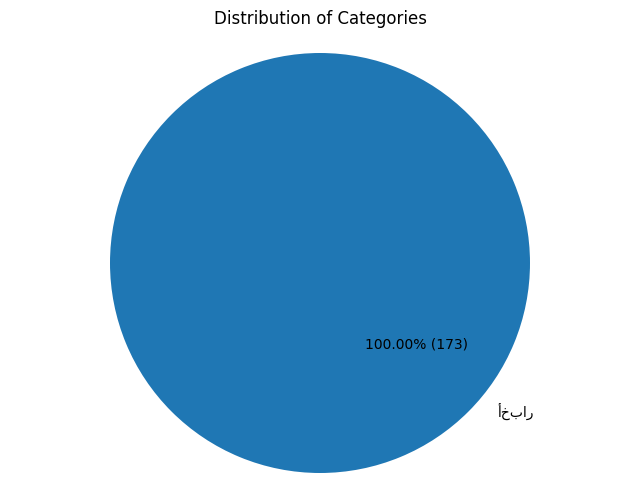

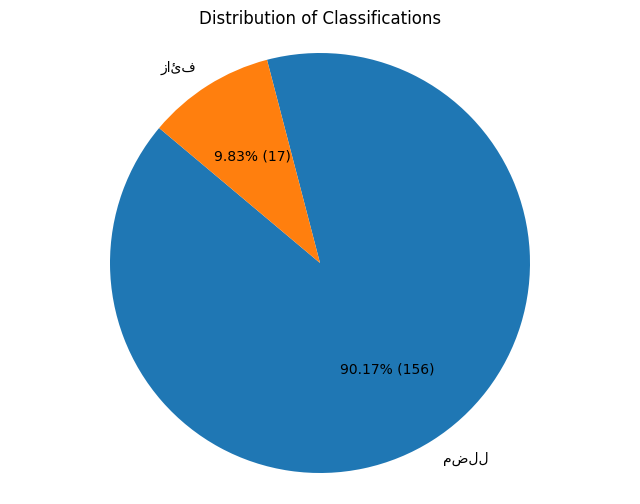


Modified DataFrame saved to 'modified_file.csv'


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('MISBAR_FACTCHECK_13-04-3pm.csv')

# Rename columns
df.columns = ["Category", "Title", "Classification", "Date", "URL", "Content", "Correction"]

# Show head
print("Head of the DataFrame:")
print(df.head())

# Remove duplicated lines
df.drop_duplicates(inplace=True)

# Show head after removing duplicates
print("\nHead of the DataFrame after removing duplicates:")
print(df.head())

# Analyze Category column
category_counts = df['Category'].value_counts()

# Plot Category counts as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(category_counts)), startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

# Analyze Classification column
classification_counts = df['Classification'].value_counts()

# Plot Classification counts as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(classification_counts, labels=classification_counts.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(classification_counts)), startangle=140)
plt.title('Distribution of Classifications')
plt.axis('equal')
plt.show()
# Save the modified DataFrame to a new CSV file
df.to_csv('MISBAR_FACTCHECK_RAW_13-04.csv', index=False)
print("\nModified DataFrame saved to 'modified_file.csv'")